In [7]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(perch_length, perch_weight, random_state=42)

print(f"X_train 크기 : {X_train.shape}")
print(f"y_train 크기 : {y_train.shape}")
print(f"X_test 크기 : {X_test.shape}")
print(f"y_test 크기 : {y_test.shape}")

X_train = X_train.reshape(-1, 1) # -1은 열의 숫자만큼 배치하면서 해으이 개수가 가변적으로 결정
y_train = y_train.reshape(-1, 1)

print(f"X_train 크기 : {X_train.shape}")
print(f"y_train 크기 : {y_train.shape}")

X_train 크기 : (42,)
y_train 크기 : (42,)
X_test 크기 : (14,)
y_test 크기 : (14,)
X_train 크기 : (42, 1)
y_train 크기 : (42, 1)


50cm 농어의 무게 예측값 : [[1241.83860323]]
기울기 : [[39.01714496]]
절편 : [-709.01864495]
[44.]
[13.7]
[[-174.48375895]]
[[1007.73573345]]


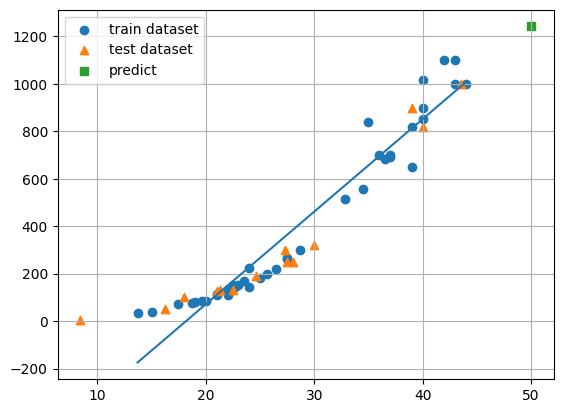

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train) # 선형회귀모델 훈련

print(f"50cm 농어의 무게 예측값 : {lr.predict([ [50] ])}")
print(f"기울기 : {lr.coef_}")
print(f"절편 : {lr.intercept_}")

x_max = max(X_train); x_min = min(X_train)
print(x_max); print(x_min)
y_min = x_min*lr.coef_ + lr.intercept_
y_max = x_max*lr.coef_ + lr.intercept_
print(y_min); print(y_max)

y_min = np.array(y_min).flatten()
y_max = np.array(y_max).flatten()

plt.scatter(X_train, y_train, marker='o', label='train dataset')
plt.scatter(X_test, y_test, marker='^', label='test dataset')
plt.scatter(50, lr.predict([ [50] ]), marker='s', label='predict')
plt.plot([x_min, x_max], [y_min, y_max])
plt.grid()
plt.legend()
plt.show()


In [10]:
# 폐암수술 환자의 생존률 예측

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf

# 실행할때마다 동일한 결과를 출력하기 위해 시드값 동일설정
np.random.seed(3)
tf.random.set_seed(3)

import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('ThoraricSurgery.csv')
print(raw_data.head(5))
data = raw_data.to_numpy()
print(data[0:5])

X = data[:,0:17]
Y = data[:, 17]

model = Sequential()
model.add(Dense(30, input_dim = 17, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model.fit(X, Y, epochs = 100, batch_size = 10)


   293  1   3.8   2.8  0  0.1  0.2  0.3  0.4  0.5  12  0.6  0.7  0.8  1.1  \
0    1  2  2.88  2.16  1    0    0    0    1    1  14    0    0    0    1   
1    8  2  3.19  2.50  1    0    0    0    1    0  11    0    0    1    1   
2   14  2  3.98  3.06  2    0    0    0    1    1  14    0    0    0    1   
3   17  2  2.21  1.88  0    0    1    0    0    0  12    0    0    0    1   
4   18  2  2.96  1.67  0    0    0    0    0    0  12    0    0    0    1   

   0.9  62  0.10  
0    0  60     0  
1    0  66     1  
2    0  80     1  
3    0  56     0  
4    0  61     0  
[[ 1.    2.    2.88  2.16  1.    0.    0.    0.    1.    1.   14.    0.
   0.    0.    1.    0.   60.    0.  ]
 [ 8.    2.    3.19  2.5   1.    0.    0.    0.    1.    0.   11.    0.
   0.    1.    1.    0.   66.    1.  ]
 [14.    2.    3.98  3.06  2.    0.    0.    0.    1.    1.   14.    0.
   0.    0.    1.    0.   80.    1.  ]
 [17.    2.    2.21  1.88  0.    0.    1.    0.    0.    0.   12.    0.
   0.    0.    1. 

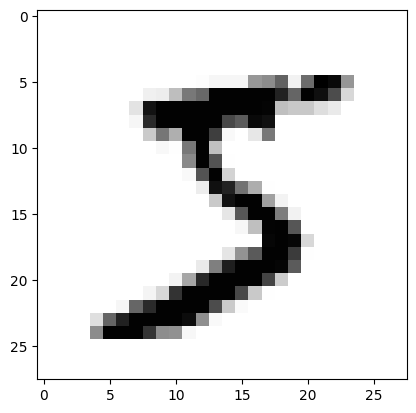

In [11]:
# MNIST 손글씨

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

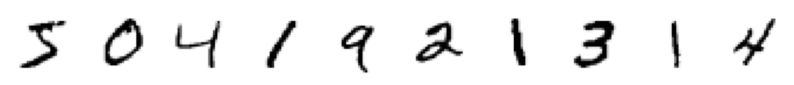

In [12]:
# 이미지 10개 출력
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='Greys')
    axs[i].axis('off')

In [13]:
# 이미지 1개 구성

import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d \t' % i)
    sys.stdout.write('\n')

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	3 	18 	18 	18 	126 	136 	175 	26 	166 	255 	247 	127 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	30 	36 	94 	154 	170 	253 	253 	253 	253 	253 	225 	172 	253 	242 	195 	64 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	49 	238 	253 	253 	253 	253 	253 	253 	253 	253 	251 	93 	82 	82 	56 	39 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	18 	219 	253 	253 	253 	253 	253 	198 	182 	247 	241 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	80 	156 	107 	253 	253 	205 	11 	0 	43 	154 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	
0 	0 	0 	0 	0 	0 	0 	0 	0 	14 	1 	154 	253

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape = (28*28, ), activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_croosentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
